# Feature Engineering & Modelling

1) import packages
2)  load data
3) Feature Enginnering(provided)
4) Modeling

# 1 ) Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# to be in notebook
%matplotlib inline

#plot style
sns.set(color_codes =True)

# 2) Load the data

In [2]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

df = pd.read_csv("clean_data post EDA.csv")
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
df =  df.drop('Unnamed: 0',axis=1)

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.00000,44.311375,0.00000,0.00000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.00000,44.385450,0.00000,0.00000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


# 3) Feature Engineering

In [4]:
price_df = pd.read_csv("price_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
 #Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()


# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()


jan_prices = jan_prices.rename(columns={'price_off_peak_var': 'jan1', 'price_off_peak_fix': 'jan2'})
dec_prices = dec_prices.rename(columns={'price_off_peak_var':'dec1','price_off_peak_fix':'dec2'})

diff = pd.merge(dec_prices,jan_prices.drop(columns='price_date'),on='id')

diff.head()

,id,price_date,dec1,dec2,jan1,jan2
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931


In [6]:
# merging the client_df with diff

final_df = pd.merge(df,diff, on='id',how='inner')
final_df = final_df[[col for col in final_df.columns if col != 'churn'] + ['churn']]

final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,price_date,dec1,dec2,jan1,jan2,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,2015-12-01,0.146033,44.266930,0.125976,40.565969,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,2015-12-01,0.147600,44.444710,0.151367,44.266931,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,2015-12-01,0.167798,44.444710,0.172468,44.266931,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,2015-12-01,0.148586,44.444710,0.153133,44.266931,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516531,16.348129,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,2015-12-01,0.119906,40.728885,0.126098,40.565969,0


# Average price changes across periods

enhancing better features by caluclating the average price changes across individual periods instead of the entire year

In [7]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [8]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [9]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
 
 
final_df = pd.merge(final_df, mean_prices[columns], on='id')
final_df = final_df[[col for col in final_df.columns if col != 'churn'] + ['churn']]

final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,price_date,dec1,dec2,jan1,jan2,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,2015-12-01,0.146033,44.266930,0.125976,40.565969,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,2015-12-01,0.147600,44.444710,0.151367,44.266931,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,2015-12-01,0.167798,44.444710,0.172468,44.266931,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,2015-12-01,0.148586,44.444710,0.153133,44.266931,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516531,16.348129,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850

# explanation
    This feature may be useful because it adds more granularity to the existing feature that my colleague found to be useful. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

# Max price changes across periods and months

Another way to to see maximum change in prices across periods and months

In [10]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [11]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [12]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [13]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

final_df = pd.merge(final_df, max_diff_across_periods_months[columns], on='id')

final_df = final_df[[col for col in final_df.columns if col != 'churn'] + ['churn']]

final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,price_date,dec1,dec2,jan1,jan2,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,2015-12-01,0.146033,44.266930,0.125976,40.565969,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,2015-12-01,0.147600,44.444710,0.151367,44.266931,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,2015-12-01,0.167798,44.444710,0.172468,44.266931,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,2015-12-01,0.148586,44.444710,0.153133,44.266931,0.151210,0.000000,0.151210,44.400265,0.0000

Calculating the maximum price change between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months, and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

# adding further features


# We are calculating how long a customer has been a client of Power Co

    Tenure

In [14]:
final_df['tenure'] = ((final_df['date_end'] - final_df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [15]:
final_df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


We can see that who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer.

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

# Transforming dates into months
    - months_activ = Number of months active until reference date (Jan 2016)
    - months_to_end = Number of months of the contract left until reference date (Jan 2016)
    - months_modif_prod = Number of months since last modification until reference date (Jan 2016)
    - months_renewal = Number of months since last renew


In [16]:


def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    try:
        time_delta = reference_date - df[column]
        months = (time_delta / np.timedelta64(1, 'M')).astype(int)
        return months
    except KeyError as e:
        print(f"Error: {e}. Please check if the column '{column}' exists in the DataFrame.")
    except TypeError as e:
        print(f"Error: {e}. Please ensure the data in column '{column}' can be subtracted from the reference date.")
    except Exception as e:
        print(f"An error occurred: {e}.")


In [17]:
# creating a reference date

reference_date = datetime(2016,1,1)

#creating columns

final_df['months_activ'] = convert_months(reference_date,final_df,'date_activ')
final_df['months_to_end'] = -convert_months(reference_date, final_df, 'date_end')
final_df['months_modif_prod'] = convert_months(reference_date, final_df, 'date_modif_prod')
final_df['months_renewal'] = convert_months(reference_date, final_df, 'date_renewal')

# explanation

 

     One could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the `months_activ` feature.

    As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

    My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

    Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal` will be a good feature to include.

In [18]:
# the dates coloumn used for fearture engineering are no longer any use for the models so juist getting rid of them

date_cols = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

final_df = final_df.drop(columns=date_cols)
final_df = final_df[[col for col in final_df.columns if col != 'churn'] + ['churn']]
final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,price_date,dec1,dec2,jan1,jan2,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,2015-12-01,0.146033,44.266930,0.125976,40.565969,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,2015-12-01,0.147600,44.444710,0.151367,44.266931,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,2015-12-01,0.167798,44.444710,0.172468,44.266931,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,2015-12-01,0.148586,44.444710,0.153133,44.266931,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9,0
4,149d57cf92fc41cf94415803a877cb4b,MISSIN

# replacing the has gas feature of t and f with 1 and 0

In [19]:
final_df['has_gas'] = final_df['has_gas'].replace(['t', 'f'], [1, 0])
final_df['has_gas'].head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: has_gas, dtype: int64

# now we are checking on other categorical features
    1) channel_sales
    2) origin_up

In [20]:
final_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [21]:
final_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [22]:
final_df['origin_up'] = final_df['origin_up'].astype('category')
final_df['channel_sales'] = final_df['channel_sales'].astype('category')


In [23]:
final_df.dtypes

id                                                object
channel_sales                                   category
cons_12m                                           int64
cons_gas_12m                                       int64
cons_last_month                                    int64
forecast_cons_12m                                float64
forecast_cons_year                                 int64
forecast_discount_energy                         float64
forecast_meter_rent_12m                          float64
forecast_price_energy_off_peak                   float64
forecast_price_energy_peak                       float64
forecast_price_pow_off_peak                      float64
has_gas                                            int64
imp_cons                                         float64
margin_gross_pow_ele                             float64
margin_net_pow_ele                               float64
nb_prod_act                                        int64
net_margin                     

In [24]:
categorical_channels = ['channel_sales','origin_up']

encoder = LabelEncoder()

for col in categorical_channels:
    try:
        final_df[col]= encoder.fit_transform(final_df[col])
        encoded_labels = final_df['channel_sales'].unique()
    except ValueError as e:
        print(e)

### Transforming numerical data

    In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

    Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

    There are many ways that you can treat skewed variables. You can apply transformations such as:
        -  Square root
        - Cubic root
        - Logarithm

        to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

        <b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

        First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [25]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

final_df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


# for fixing the high standard deviation we are applying log10 transformation

In [26]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]
done = {}

for column in skewed:
    try:
        final_df[column] = np.log10(final_df[column] +1)
        done[column] = True
    except KeyError as e:
        print(f"Error: {e}. Please check if the column '{column}' exists in the DataFrame.")
        done[column] = False
    except TypeError as e:
        print(f"Error: {e}. Please ensure the data in column '{column}' can be processed.")
        done[column] = False
    except Exception as e:
        print(f"An error occurred: {e}.")
        done[column] = False


In [27]:
final_df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.050868,1.517233,0.055766,0.020917,1.636057
std,0.884545,1.716828,1.769266,0.683612,1.584972,0.267329,0.571489,0.009438,0.020297,0.134242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.047796,0.000000,1.619163
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.058109,0.035085,1.656207
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.059316,0.040933,1.656207
max,6.792889,6.618528,5.887169,4.918575,5.243970,1.491362,2.778376,0.105157,0.077722,1.780075


# The standard deviation has drastically reduced

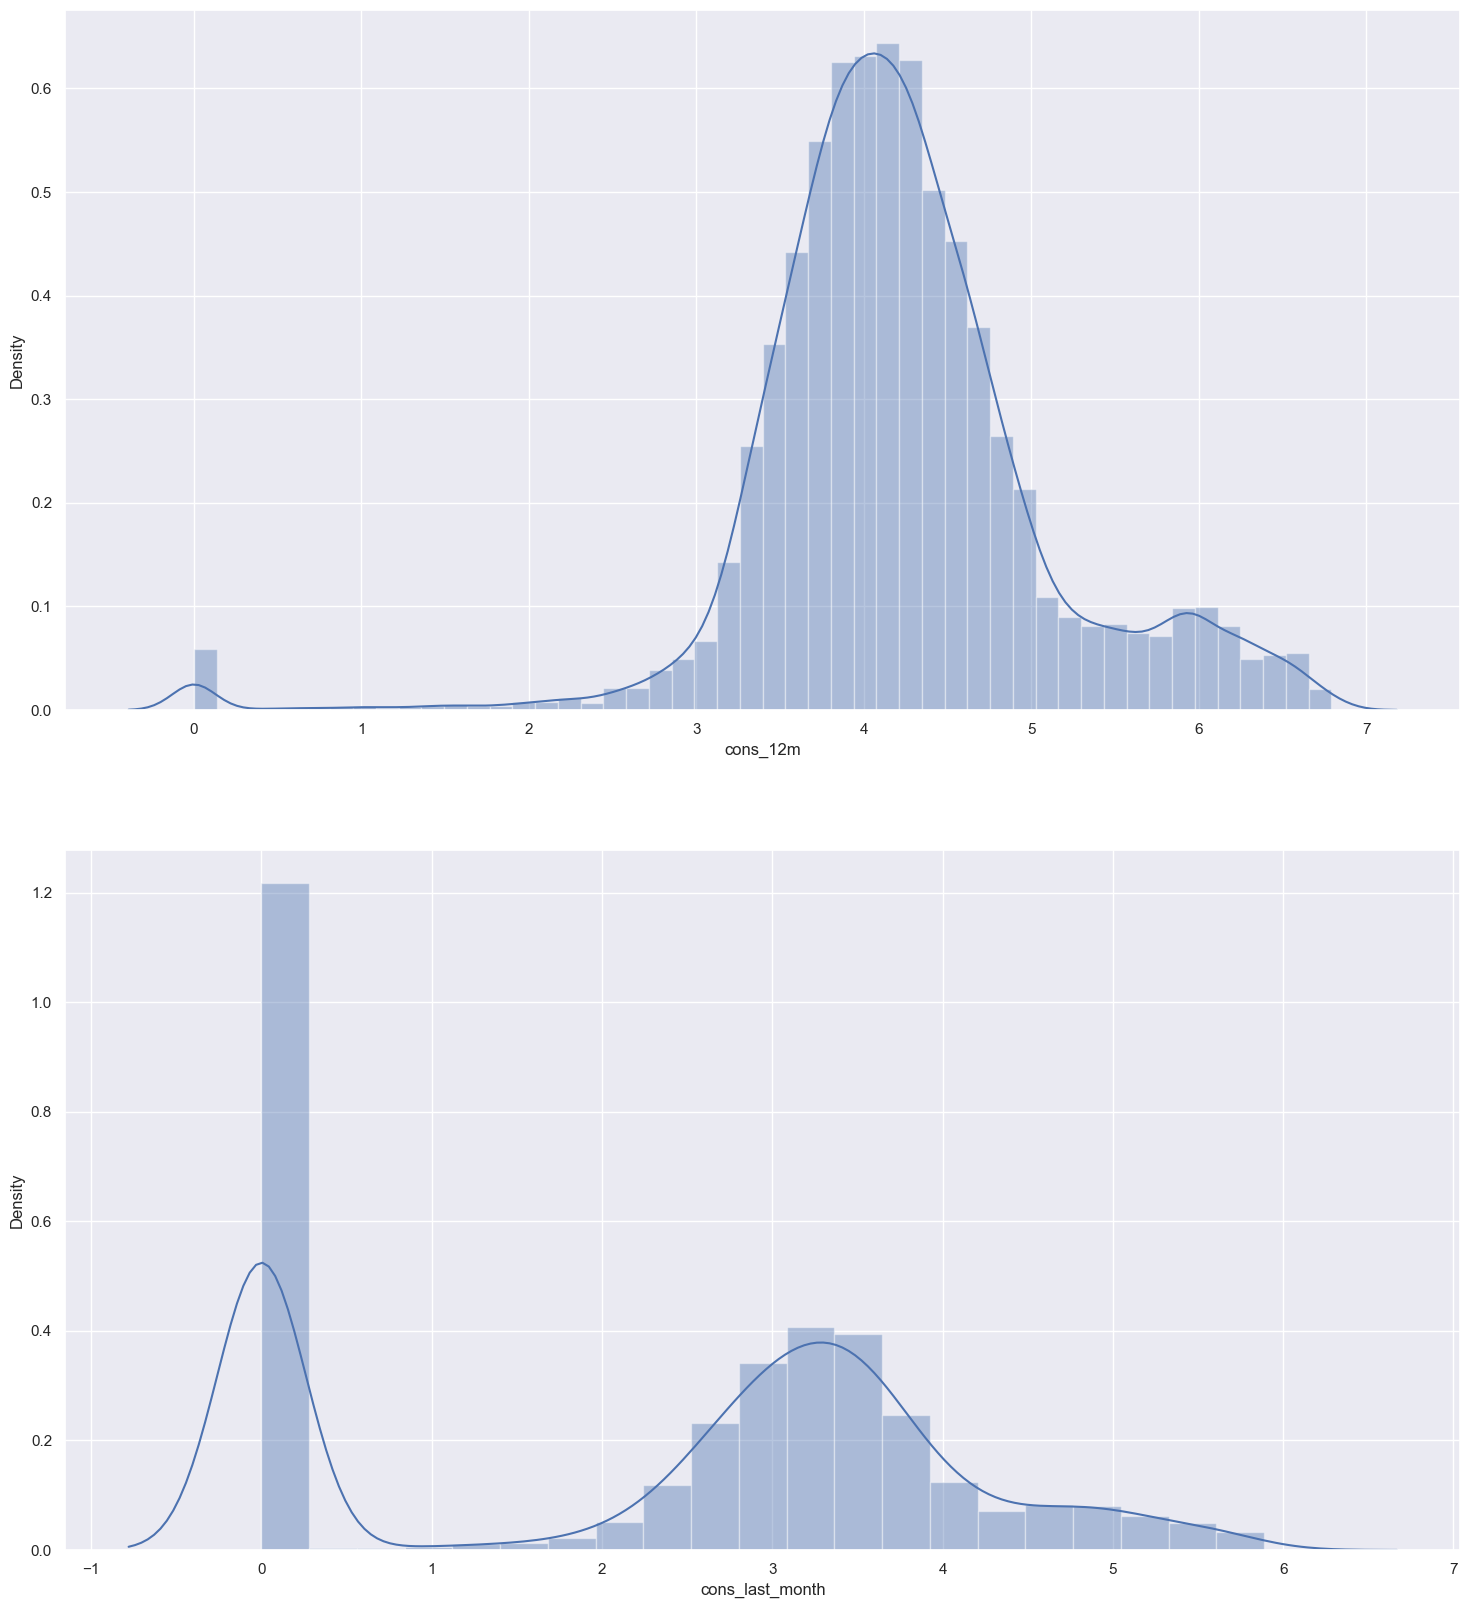

In [28]:
fig, axs = plt.subplots(nrows=2, figsize=(18, 20))
# Plot histograms
sns.distplot((final_df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((final_df["cons_last_month"].dropna()), ax=axs[1])
plt.show()

### Correlations

    In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model. 

    For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

    This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

    For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

    Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

    So now let's look at how all the features within the model are correlated.

In [29]:
correlation = final_df.corr()

In [30]:
correlation.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,dec1,dec2,jan1,jan2,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,churn
channel_sales,1.000000,0.076554,-0.021148,0.047265,0.079928,0.016361,0.038461,-0.014431,0.099181,-0.031379,0.087118,-0.021180,0.008792,0.046714,0.046624,-0.022906,0.023667,-0.478057,0.212695,-0.026876,0.112799,-0.030981,-0.018857,0.059084,-0.036591,-0.012187,0.059447,-0.036597,-0.012218,0.107696,-0.030502,-0.019202,0.059313,-0.036797,-0.012400,0.059669,-0.036801,-0.012432,0.103011,-0.030671,-0.020569,0.054477,-0.037956,-0.013714,0.054830,-0.037958,-0.013746,0.102363,0.053705,0.112198,0.056134,0.067071,-0.030165,0.061071,0.051359,-0.071915,0.035547,0.068468,-0.028043,0.062323,0.048299,-0.071550,0.032824,-0.467388,-0.496106,-0.037681,-0.218241,0.038350,0.029149
cons_12m,0.076554,1.000000,0.209690,0.623519,0.557190,0.321933,-0.027523,0.201486,-0.143045,0.278319,-0.051862,0.154841,0.310521,-0.044501,-0.044473,0.107284,0.341291,0.006799,-0.017839,0.172556,-0.137184,0.275753,0.221047,-0.132526,0.210979,0.234561,-0.132769,0.211411,0.234508,-0.140019,0.276195,0.222196,-0.135890,0.211224,0.234654,-0.136156,0.211659,0.234606,-0.140415,0.276731,0.225071,-0.141180,0.213667,0.236849,-0.141438,0.214099,0.236804,-0.139786,-0.142830,-0.125490,-0.124687,-0.276563,0.202469,-0.209032,-0.227602,0.149567,-0.237171,-0.273738,0.170541,-0.195321,-0.215016,0.152183,-0.227321,-0.026953,-0.003333,-0.094373,0.074150,0.081067,-0.016695
cons_gas_12m,-0.021148,0.209690,1.000000,0.171315,0.108419,0.084769,0.001988,0.063595,-0.040926,0.075562,0.006413,0.941180,0.083819,-0.013401,-0.013415,0.688456,0.104634,0.007853,-0.004404,0.066315,-0.036670,0.075081,0.073805,-0.020410,0.071103,0.077317,-0.020524,0.071175,0.077304,-0.037518,0.075449,0.073580,-0.021946,0.070396,0.076656,-0.022066,0.070473,0.076645,-0.038373,0.075353,0.074964,-0.024183,0.071497,0.077616,-0.024301,0.071572,0.077607,-0.036450,-0.022285,-0.035724,-0.018170,-0.075050,0.038224,-0.065887,-0.068720,0.053203,-0.067822,-0.074437,0.025174,-0.062439,-0.065172,0.053662,-0.064244,0.005158,0.006390,0.009154,0.019419,-0.005549,-0.025088
cons_last_month,0.047265,0.623519,0.171315,1.000000,0.292771,0.786030,-0.013630,0.326319,-0.235613,0.396892,-0.042498,0.132816,0.422190,0.040473,0.040413,0.096345,0.242811,0.029110,0.046839,0.234128,-0.219406,0.398678,0.382668,-0.132893,0.379400,0.387674,-0.133540,0.379775,0.387666,-0.221955,0.398699,0.384360,-0.133123,0.380742,0.388971,-0.133820,0.381121,0.388966,-0.223434,0.397739,0.386817,-0.137285,0.382995,0.391037,-0.137986,0.383369,0.391034,-0.222690,-0.139394,-0.212373,-0.131280,-0.407637,0.21443

In [31]:
final_df = final_df.drop(columns=['num_years_antig', 'forecast_cons_year'],axis=1)
final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,origin_up,pow_max,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,price_date,dec1,dec2,jan1,jan2,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,churn
0,24011ae4ebbe3035111d65fa7c15bc57,4,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,1.619163,1,0.00,25.44,25.44,2,678.99,4,43.648,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,2015-12-01,0.146033,44.266930,0.125976,40.565969,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,1.656207,0,0.00,16.38,16.38,1,18.89,2,13.800,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,2015-12-01,0.147600,44.444710,0.151367,44.266931,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4,0
2,764c75f661154dac3a6c254cd082ea7d,4,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,1.656207,0,0.00,28.60,28.60,1,6.60,2,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,2015-12-01,0.167798,44.444710,0.172468,44.266931,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8,0
3,bba03439a292a1e166f80264c16191cb,5,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,1.656207,0,0.00,30.22,30.22,1,25.46,2,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,2015-12-01,0.148586,44.444710,0.153133,44.266931,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9,0
4,149d57cf92fc41cf94415803a877cb4b,0,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,1.619163,0,52.32,44.91,44.91,1,47.98,2,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516

# Modelling 
# Advantages of using Random forest for churn prediction in this case
    1)Accuracy: Random Forest generally provides high prediction accuracy compared to other algorithms. It is capable of capturing complex relationships and interactions between features, making it suitable for churn prediction where multiple factors may contribute to customer churn.

    2)Robust to Overfitting: Random Forest is less prone to overfitting compared to individual decision trees. The ensemble nature of Random Forest, which combines multiple decision trees, helps to reduce overfitting and improve generalization.

    3)Feature Importance: Random Forest can provide insights into feature importance, indicating which features have the most significant impact on predicting churn. This information can be valuable for understanding the underlying factors driving customer churn.

    4)Handling of Missing Data: Random Forest can effectively handle missing data in the dataset. It can handle missing values without imputing them, which simplifies the preprocessing step and saves time.

    5)Robustness to Outliers: Random Forest is relatively robust to outliers and noise in the data. Outliers have less impact on the overall model performance due to the averaging effect of multiple trees.
# Disadvantages of using Random Forest for churn prediction in this use case:

    1)Model Interpretability: Random Forest models are not as easily interpretable as simpler models like logistic regression. Understanding the exact reasoning behind individual predictions can be challenging, especially when dealing with a large number of trees in the ensemble.

    2)Computationally Expensive: Training a Random Forest model can be computationally expensive, particularly when dealing with a large number of features and a substantial amount of data. It requires more computational resources and time compared to simpler models.

    3)Hyperparameter Tuning: Random Forest has several hyperparameters that need to be tuned to achieve optimal performance. Finding the right set of hyperparameters can be time-consuming and may require extensive experimentation.

    4)Imbalanced Data: Random Forest can face challenges in handling imbalanced datasets, where the number of churned customers is significantly lower than non-churned customers. Special techniques such as resampling or class weighting may be necessary to address this issue.

    5)Model Size: Random Forest models can be relatively large in size, especially when dealing with a large number of trees. This can be a consideration when deploying the model in production systems with limited memory or storage resources

In [32]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
# copy of our data

train_df = final_df.copy()

In [34]:
train_df.dtypes


id                                                object
channel_sales                                      int32
cons_12m                                         float64
cons_gas_12m                                     float64
cons_last_month                                  float64
forecast_cons_12m                                float64
forecast_discount_energy                         float64
forecast_meter_rent_12m                          float64
forecast_price_energy_off_peak                   float64
forecast_price_energy_peak                       float64
forecast_price_pow_off_peak                      float64
has_gas                                            int64
imp_cons                                         float64
margin_gross_pow_ele                             float64
margin_net_pow_ele                               float64
nb_prod_act                                        int64
net_margin                                       float64
origin_up                      

In [35]:
X = train_df.drop(columns=['id','churn','price_date'],axis=1)
Y = train_df[['churn']]
print(X.shape)
print(Y.shape)

(14605, 66)
(14605, 1)


In [36]:
X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10223, 66)
(4382, 66)
(10223, 1)
(4382, 1)


# Hyperparameter tuning for the model to find the best accuracy

In [37]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300,1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10,]
    
}
try:
    grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

    grid_search.fit(X_train,Y_train)
    print("The Best parameters:",grid_search.best_params_)
    print("Best_Score:",grid_search.best_score_)
except Exception as e:
    print(e)

KeyboardInterrupt: 

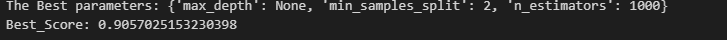

#  The best parameters for the Hyperparameter of the classifier
    1)The Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 1000}

    2)this parameter for the model of random forest generates the highest accuracy

In [ ]:
# So plotting the best of Random Forest on the data

Classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=1000)

#fitting the training data 

Classifier.fit(X_train,Y_train)

accuracy = Classifier.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9098585120949338


In [ ]:
Y_pred = Classifier.predict(X_test)
accuracy = accuracy_score(Y_pred,Y_test)
accuracy_percentage = accuracy *100

print("The accuracy of the model is:{:.2f}%".format(accuracy_percentage) )

The accuracy of the model is:90.99%


# is my model performance is satisfactory? 

    Comparison to Baseline: It is essential to compare the model's accuracy to a baseline or random chance. If the baseline accuracy is significantly lower than 90.56%, then achieving such high accuracy demonstrates the effectiveness of the model. However, if the baseline accuracy is already close to or higher than 90.58%, it suggests that the model's performance might not be as satisfactory.

    Business Context: The definition of "satisfactory" depends on the specific requirements and objectives of the business. Consider the impact of misclassifications and the associated costs. If the consequences of misidentifying a customer at risk of churn are severe, then a higher level of accuracy might be necessary for satisfactory performance. On the other hand, if the cost of false positives or false negatives is relatively low, a 90.56% accuracy might be considered satisfactory.

    Trade-Offs: Model performance should be evaluated in conjunction with other factors such as computational resources, data availability, and model complexity. If achieving a higher accuracy requires significant computational resources or complex models that are difficult to interpret or maintain, then the 90.58% accuracy may be satisfactory given the trade-offs involved.

    Benchmarking: Compare the model's accuracy to similar industry standards or other published research in the field. If the model's accuracy is on par with or higher than existing benchmarks, it indicates a satisfactory performance.

    Validation Metrics: Accuracy alone might not be sufficient to assess model performance. Consider other evaluation metrics such as precision, recall, F1 score, or ROC AUC to gain a more comprehensive understanding of the model's predictive capability.

In [ ]:
predictions = Classifier.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, predictions).ravel()

In [ ]:
Y_test.value_counts()

churn
0        3956
1         426
dtype: int64

In [ ]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(Y_test, predictions)}")
print(f"Precision: {metrics.precision_score(Y_test, predictions)}")
print(f"Recall: {metrics.recall_score(Y_test, predictions)}")

True positives: 36
False positives: 5
True negatives: 3951
False negatives: 390

Accuracy: 0.9098585120949338
Precision: 0.8780487804878049
Recall: 0.08450704225352113


# Model understanding 

    A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': Classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


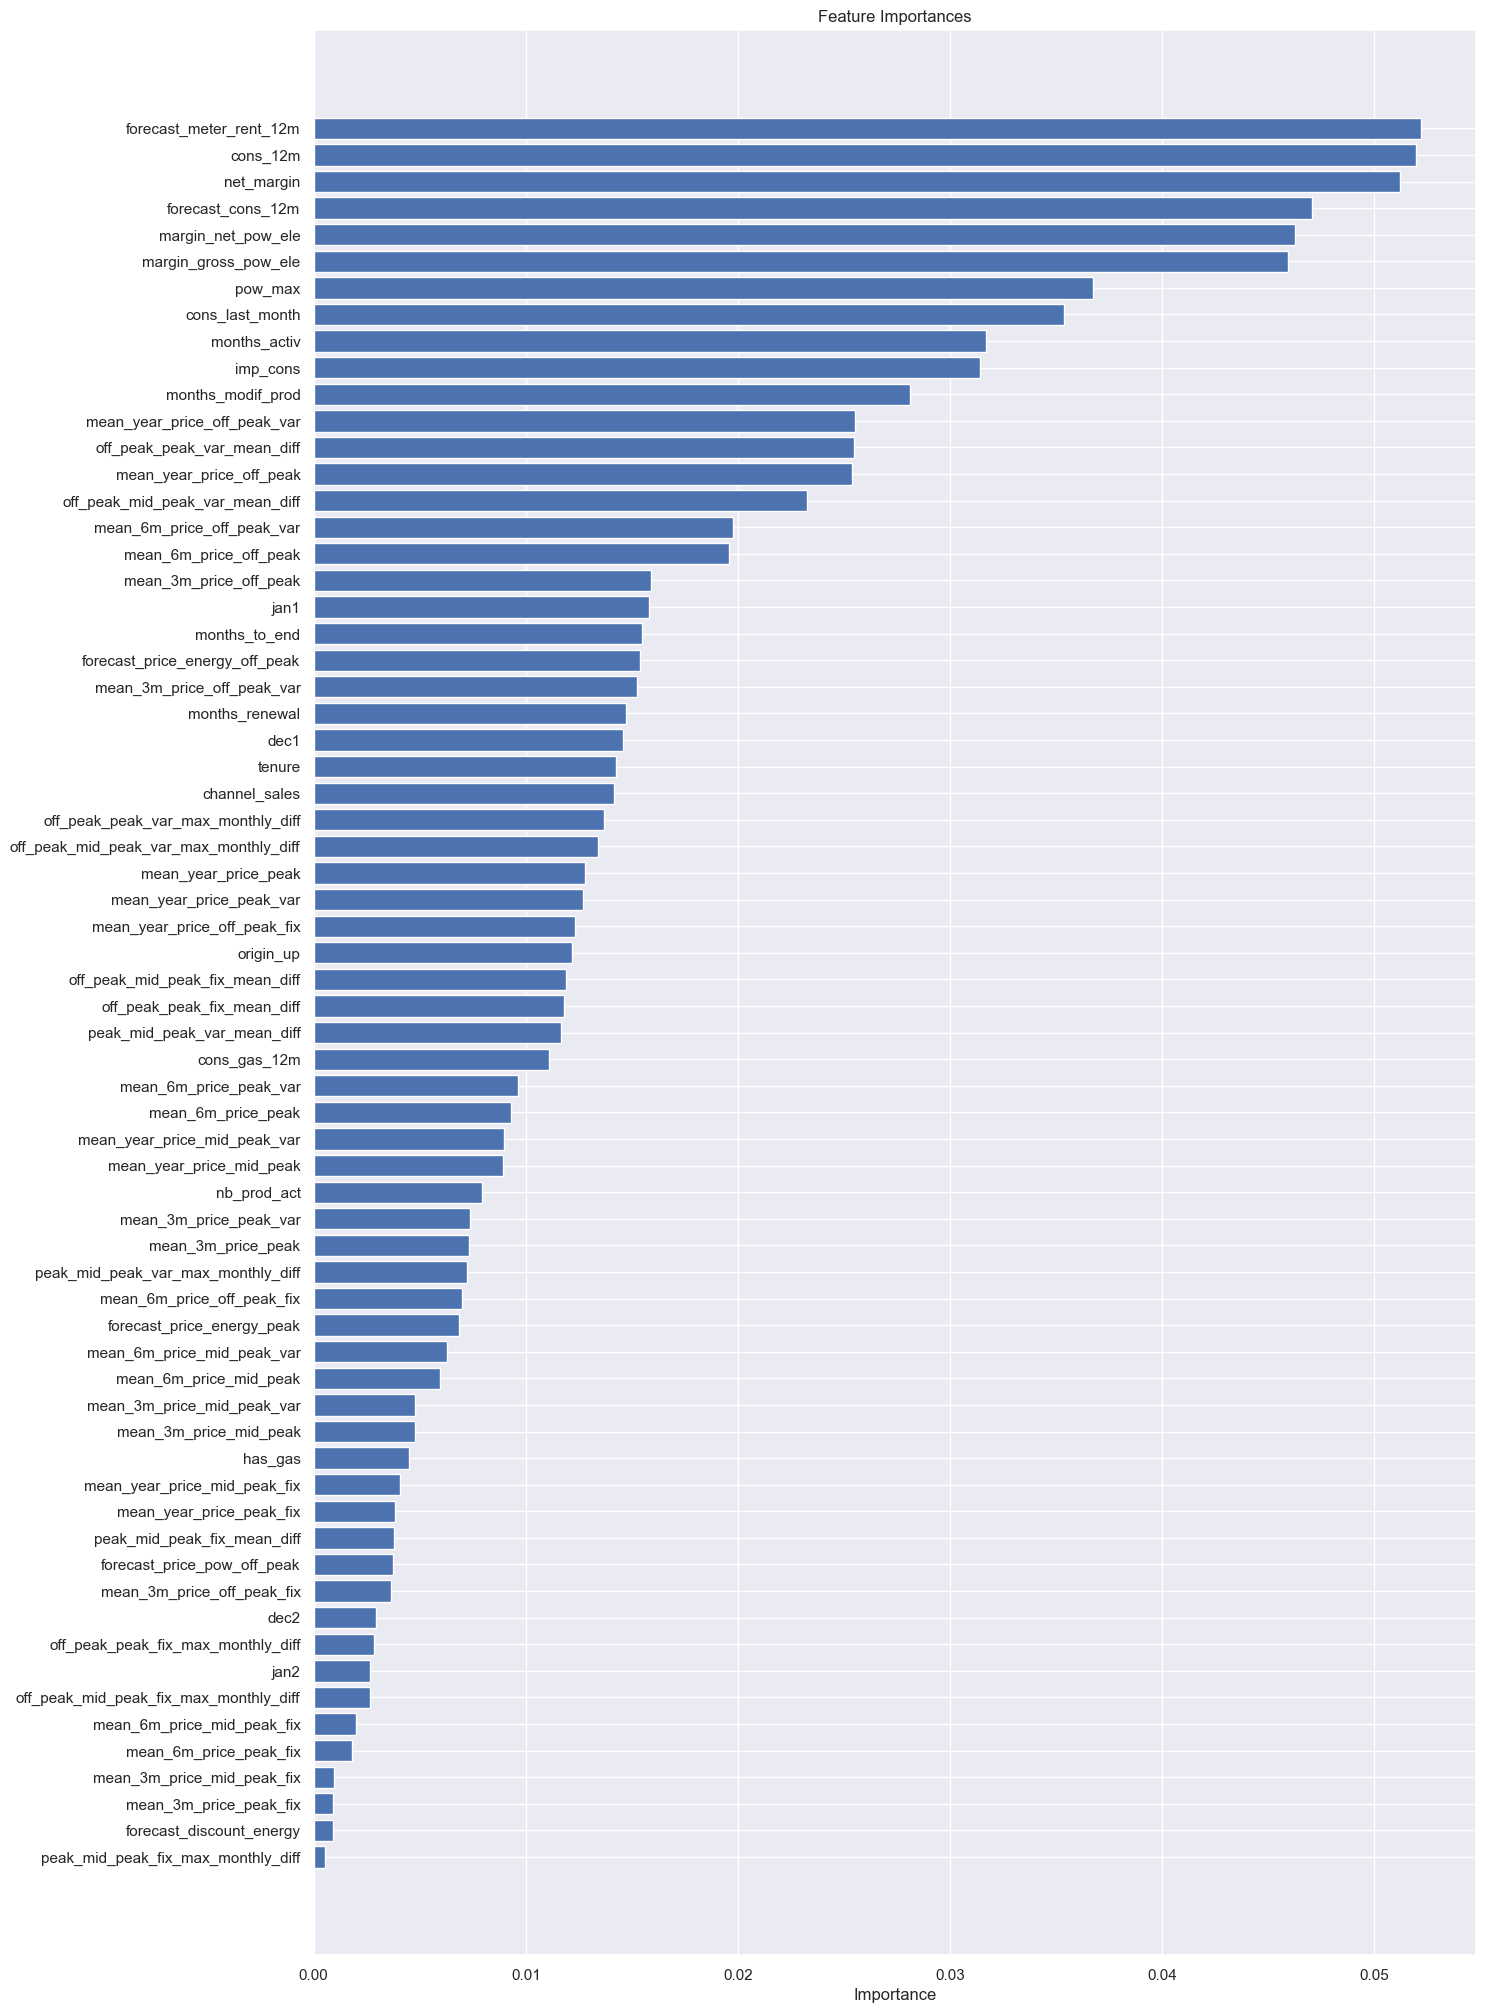

In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

# From this chart, we can observe the following points:

    -  Net margin ,forecast_meter_rent & consumption over 12 months is a top driver for churn in this model
    - Margin on power subscription also is an influential driver
    - Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract


    The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [ ]:
proba_predictions = Classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [ ]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [ ]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('sample_data_with_predictions.csv')

In [ ]:
import pickle

with open('churn_prediction_model.pkl', 'wb') as f:
    pickle.dump(Classifier, f)